In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import dask.dataframe as dd
from toolbox.data_aggregation import *
from toolbox.linear_reg import *
import datetime
import numpy as np

In [2]:
train_dd = dd.read_csv("data/train.csv")

In [3]:
some_store_nbr = 25
some_item_nbr = 103665
%time some_item_data = fetch_item_data_by_store(train_dd, some_item_nbr, some_store_nbr)

C:\Users\xiaoyu\.edm\envs\mle3\lib\site-packages\dask\local.py:290: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  result = _execute_task(task, data)


Wall time: 1min 17s


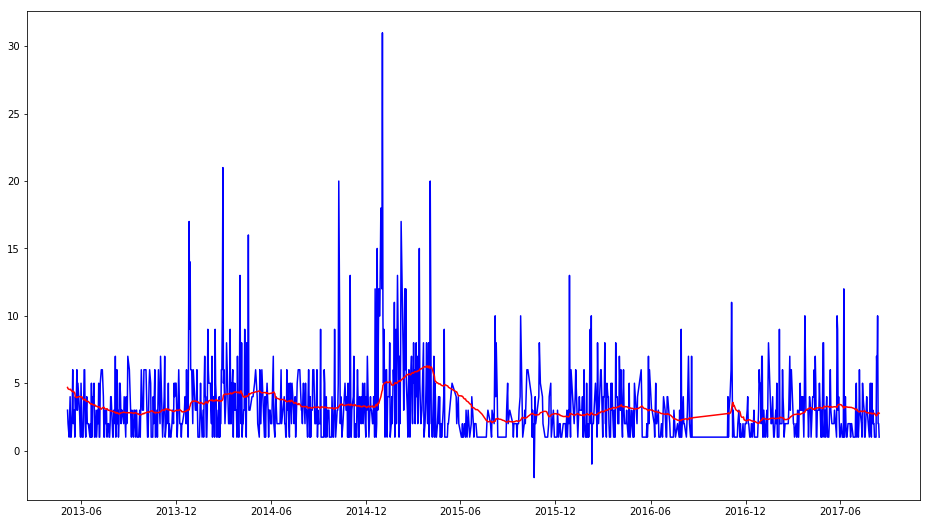

In [4]:
ground_truth, prediction = moving_average_pred(some_item_data, memory_length=100)
plt.figure(figsize=(16, 9))
plt.plot(ground_truth[:, 0], ground_truth[:, 1], 'b-', prediction[:, 0], prediction[:, 1], 'r-')

# Linear Regression

In [5]:
%time some_item_fullseries = impute_item_data(some_item_data)
%time X, y = generate_examples(some_item_fullseries, example_spacing=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Wall time: 202 ms
Wall time: 18.7 ms


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lin_reg = LinearRegression()
scores = cross_val_score(lin_reg, X_train, y_train, cv=5)

In [7]:
scores

array([ 0.02253817,  0.06731094, -0.05944239, -0.02547182, -0.04463528])

In [8]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(lin_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

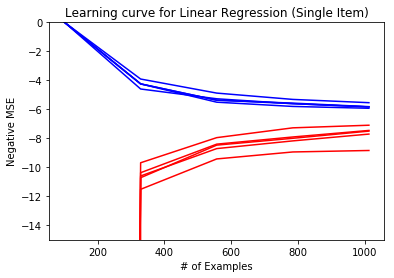

In [9]:
plt.plot(train_sizes, train_scores, 'b-')
plt.plot(train_sizes, valid_scores, 'r-')
plt.ylim([-15, 0])
plt.title("Learning curve for Linear Regression (Single Item)")
plt.xlabel("# of Examples")
plt.ylabel("Negative MSE")

Use Root mean square log error (RMSLE) in accordance with competetion evaluation.

In [10]:
np.place(y_train, y_train < 0, [0]) # Replace all negative targets with 0 
y_train_log = np.log(y_train + 1)

In [11]:
y_train[:5]

array([[ 3.,  1.,  0.,  2.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 2.,  0.,  0.,  0.,  6.],
       [ 1.,  0.,  1.,  0.,  5.]])

In [12]:
y_train_log[:5]

array([[ 1.38629436,  0.69314718,  0.        ,  1.09861229,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.69314718,  0.        ],
       [ 1.09861229,  0.        ,  0.        ,  0.        ,  1.94591015],
       [ 0.69314718,  0.        ,  0.69314718,  0.        ,  1.79175947]])

In [13]:
train_sizes, train_scores, valid_scores = learning_curve(lin_reg, X_train, y_train_log, scoring='neg_mean_squared_error', cv=5)

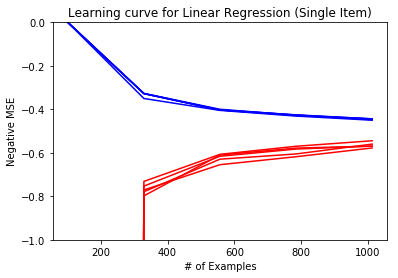

In [14]:
plt.plot(train_sizes, train_scores, 'b-')
plt.plot(train_sizes, valid_scores, 'r-')
plt.ylim([-1, 0])
plt.title("Learning curve for Linear Regression (Single Item)")
plt.xlabel("# of Examples")
plt.ylabel("Negative MSE")

So the socre will be ~ 0.6, pretty bad...

# Linear regression with longer  or shorter history

In [15]:
X, y = generate_examples(some_item_fullseries, memory_length=365,example_spacing=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
np.place(y_train, y_train < 0, [0]) # Replace all negative targets with 0 
y_train_log = np.log(y_train + 1)

In [17]:
train_sizes, train_scores, valid_scores = learning_curve(lin_reg, X_train, y_train_log, scoring='neg_mean_squared_error', cv=5)

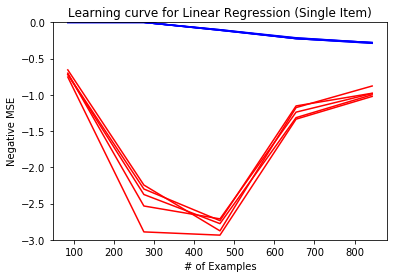

In [18]:
plt.plot(train_sizes, train_scores, 'b-')
plt.plot(train_sizes, valid_scores, 'r-')
plt.ylim([-3, 0])
plt.title("Learning curve for Linear Regression (Single Item)")
plt.xlabel("# of Examples")
plt.ylabel("Negative MSE")

Long memory of 365 days make a model with high variance and meanwhile reducing the training set size.

In [19]:
X, y = generate_examples(some_item_fullseries, memory_length=30,example_spacing=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
np.place(y_train, y_train < 0, [0]) # Replace all negative targets with 0 
y_train_log = np.log(y_train + 1)

In [21]:
train_sizes, train_scores, valid_scores = learning_curve(lin_reg, X_train, y_train_log, scoring='neg_mean_squared_error', cv=5)

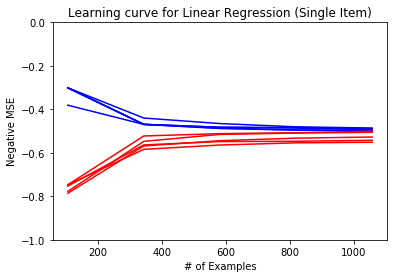

In [22]:
plt.plot(train_sizes, train_scores, 'b-')
plt.plot(train_sizes, valid_scores, 'r-')
plt.ylim([-1, 0])
plt.title("Learning curve for Linear Regression (Single Item)")
plt.xlabel("# of Examples")
plt.ylabel("Negative MSE")

# Prediction model for the whole class to increase # of samples

In [31]:
len(train_dd)

C:\Users\xiaoyu\.edm\envs\mle3\lib\site-packages\dask\local.py:290: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  result = _execute_task(task, data)


125497040